In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import seaborn as sns

# seaborn plot styles

sns.set_style("dark")
sns.set_palette("deep")
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20
myblue = '#0b5394'

%matplotlib inline

from sklearn.model_selection import train_test_split

#display all output form a cell not just the last (the options are 'all', 'none', 'last' and 'last_expr'.)

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [4]:
raw_data = pd.read_csv('../data/train.csv')

In [5]:
#EDA

raw_data.head()
raw_data.shape
raw_data.describe()

raw_data.info()

#no missing values
raw_data.isna().sum()

#each breath has 80 observations recorded various time stamps between 0 to 3 s
raw_data.groupby(['breath_id']).count().describe()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


(6036000, 8)

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,3.018000e+06,6.283886e+04,2.703618e+01,2.608072e+01,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01
std,1.742443e+06,3.633526e+04,1.959549e+01,1.715231e+01,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00
min,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00
25%,1.509001e+06,3.137700e+04,5.000000e+00,1.000000e+01,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00
50%,3.018000e+06,6.276550e+04,2.000000e+01,2.000000e+01,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00
75%,4.527000e+06,9.430100e+04,5.000000e+01,5.000000e+01,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01
max,6.036000e+06,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   float64
dtypes: float64(3), int64(5)
memory usage: 368.4 MB


id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

,id,R,C,time_step,u_in,u_out,pressure
count,75450.0,75450.0,75450.0,75450.0,75450.0,75450.0,75450.0
mean,80.0,80.0,80.0,80.0,80.0,80.0,80.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,80.0,80.0,80.0,80.0,80.0,80.0,80.0
25%,80.0,80.0,80.0,80.0,80.0,80.0,80.0
50%,80.0,80.0,80.0,80.0,80.0,80.0,80.0
75%,80.0,80.0,80.0,80.0,80.0,80.0,80.0
max,80.0,80.0,80.0,80.0,80.0,80.0,80.0


In [6]:
# there are negative values of pressure
# exploring how many observations have negative values of pressure

negative_pressures = raw_data[raw_data['pressure']<0]
negative_pressures.describe()

#3713 observations have negative pressure
#these are in 73 different breaths

negative_pressures['breath_id'].unique().shape


negative_pressures.groupby(['breath_id']).count()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,3.713000e+03,3713.000000,3713.0,3713.0,3713.000000,3713.000000,3713.000000,3713.000000
mean,3.196229e+06,66548.839483,50.0,10.0,1.304634,0.257526,0.614597,-1.127306
std,1.650927e+06,34422.982717,0.0,0.0,0.806752,0.329926,0.486756,0.549540
min,2.872100e+04,542.000000,50.0,10.0,0.000000,0.000000,0.000000,-1.895744
25%,2.195458e+06,45681.000000,50.0,10.0,0.567511,0.057006,0.000000,-1.614536
50%,2.838494e+06,59101.000000,50.0,10.0,1.335314,0.139605,1.000000,-1.333327
75%,4.679095e+06,97520.000000,50.0,10.0,2.035259,0.306323,1.000000,-0.700608
max,5.979920e+06,124575.000000,50.0,10.0,2.645007,2.260934,1.000000,-0.067889


(73,)

,id,R,C,time_step,u_in,u_out,pressure
breath_id,,,,,,,
542,80,80,80,80,80,80,80
851,80,80,80,80,80,80,80
3928,1,1,1,1,1,1,1
7949,10,10,10,10,10,10,10
11216,80,80,80,80,80,80,80
...,...,...,...,...,...,...,...
118131,80,80,80,80,80,80,80
119582,12,12,12,12,12,12,12
120445,80,80,80,80,80,80,80


In [7]:
#dropping breaths with negative pressures at any stage


breath_ids_to_drop = negative_pressures['breath_id'].unique()
breath_ids_to_keep = [i for i in raw_data['breath_id'].unique() if i not in breath_ids_to_drop]
assert(len(breath_ids_to_keep)+breath_ids_to_drop.shape[0] == raw_data['breath_id'].unique().shape[0])

data_with_positive_pressures = raw_data[raw_data['breath_id'].isin(breath_ids_to_keep)]

#still have 99.90% of the data after dropping breaths with a negative pressure recorded at any time stamp

data_with_positive_pressures.shape[0]/raw_data.shape[0]


0.9990324718356528

In [8]:
#train_test_split to have unseen validation data

data_breath_ids, validation_data_breath_ids = train_test_split(breath_ids_to_keep, test_size=0.25, random_state=42)

data = raw_data[raw_data['breath_id'].isin(data_breath_ids)]
validation_data = raw_data[raw_data['breath_id'].isin(validation_data_breath_ids)]

assert(data_with_positive_pressures.shape[0] == data.shape[0] + validation_data.shape[0])

In [9]:
#saving cleaned data

# data.to_csv('../data/train_clean.csv', index=False)
# validation_data.to_csv('../data/validation_clean.csv', index=False)

In [10]:
#EDA with cleaned up training data

data.describe()

data.shape

#double checking that every breath has 80 observations
data.groupby(['breath_id']).count()['id'].unique()

# are the observations for each breath taken at the same time intervals? - No!

data[data['breath_id'] == 1]['time_step'].equals(data[data['breath_id'] == 2]['time_step'])

#how different are the timestamps for breaths 1 and 2
#given the steps are roughly 0.0375 (3/80) of a second apart, timestamps for breaths 1 and 2 are not very far apart
data[data['breath_id'] == 1]['time_step'].values - data[data['breath_id'] == 2]['time_step'].values

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,4.522560e+06,4.522560e+06,4.522560e+06,4.522560e+06,4.522560e+06,4.522560e+06,4.522560e+06,4.522560e+06
mean,3.020667e+06,6.289451e+04,2.704681e+01,2.612786e+01,1.307231e+00,7.340400e+00,6.204510e-01,1.123612e+01
std,1.744493e+06,3.637792e+04,1.959106e+01,1.716982e+01,7.659850e-01,1.345519e+01,4.852748e-01,8.110156e+00
min,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.413633e-03
25%,1.506961e+06,3.133850e+04,5.000000e+00,1.000000e+01,6.429014e-01,4.014948e-01,0.000000e+00,6.329607e+00
50%,3.024480e+06,6.289200e+04,2.000000e+01,2.000000e+01,1.308128e+00,4.392831e+00,1.000000e+00,7.032628e+00
75%,4.534400e+06,9.445750e+04,5.000000e+01,5.000000e+01,1.965489e+00,4.984061e+00,1.000000e+00,1.371133e+01
max,6.036000e+06,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


(4522560, 8)

array([80])

False

array([ 0.00000000e+00, -3.45230103e-04, -6.36577606e-04, -5.19275665e-04,
       -1.61647797e-04, -3.12328339e-04, -3.79085541e-04, -3.48806381e-04,
       -3.00884247e-04, -3.37123871e-04, -2.86102295e-04, -3.75747681e-04,
       -2.29835510e-04, -3.23295593e-04, -6.10351562e-05, -1.69038773e-04,
       -1.69277191e-04, -2.69412994e-05, -5.34057617e-05, -1.33752823e-04,
        1.09672546e-05,  1.03712082e-03,  1.10149384e-03,  9.14096832e-04,
        1.06954575e-03,  1.19709969e-03,  1.32560730e-03,  1.14035606e-03,
        1.20496750e-03,  1.16014481e-03,  9.40084457e-04,  1.09910965e-03,
        9.73939896e-04,  8.89301300e-04,  1.07502937e-03,  1.02591515e-03,
        1.12318993e-03,  1.07288361e-03,  1.11293793e-03,  1.17731094e-03,
        1.22070312e-03,  1.20472908e-03,  1.18470192e-03,  1.40595436e-03,
        1.44338608e-03,  1.41334534e-03,  1.21045113e-03,  9.16004181e-04,
        1.11675262e-03,  1.03783607e-03,  9.11474228e-04,  6.14404678e-04,
        4.61339951e-04,  

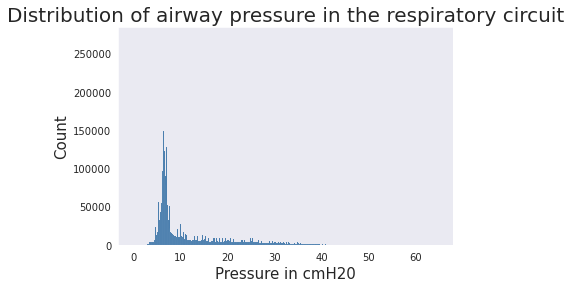

In [84]:
#Looking at the distribution of pressure
fig,ax= plt.subplots()

ax = sns.histplot(data['pressure'], color = myblue);
ax.set(xlabel = 'Pressure in cmH20', title = 'Distribution of airway pressure in the respiratory circuit');


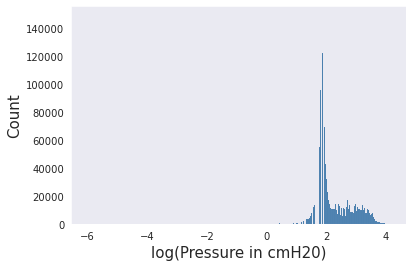

In [12]:
#Looking at the distribution of log(pressure)

ax = sns.histplot(np.log(data['pressure']), color = myblue);
ax.set(xlabel = 'log(Pressure in cmH20)');

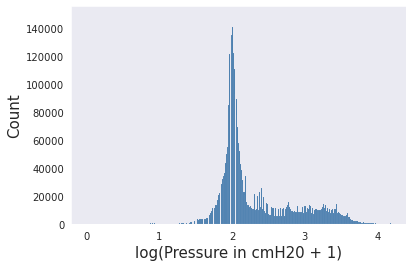

In [13]:
# will try to predict log(pressure + k) and tune k (between 0.5 to 5?)

#Looking at the distribution of log(pressure + 1)

ax = sns.histplot(np.log(data['pressure'] + 1), color = myblue);
ax.set(xlabel = 'log(Pressure in cmH20 + 1)');

[Text(0.5, 0, 'u_in')]

count    4.522560e+06
mean     7.340400e+00
std      1.345519e+01
min      0.000000e+00
0%       0.000000e+00
1%       0.000000e+00
10%      0.000000e+00
25%      4.014948e-01
50%      4.392831e+00
75%      4.984061e+00
90%      1.758284e+01
99%      7.452688e+01
100%     1.000000e+02
max      1.000000e+02
Name: u_in, dtype: float64

(5982,)

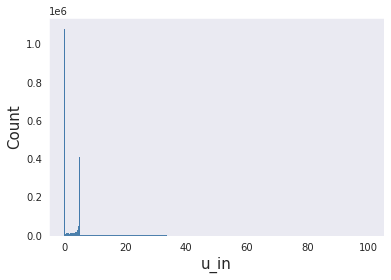

In [98]:
#distribution of control variables

ax = sns.histplot(data['u_in'], color = myblue);
ax.set(xlabel = 'u_in');
# ax.set_xlim(0,data['u_in'].max()+1)
data['u_in'].describe(percentiles = [0,0.01,0.1,0.25,0.5,0.75,0.9,0.99,1])
data[data['u_in']==100]['breath_id'].unique().shape

In [2]:
data = pd.read_csv('../data/train_clean.csv')

,id,breath_id,R,C,time_step,u_in,u_out,pressure
5040,5921,100,5,10,0.000000,4.733196,0,6.118700
5041,5922,100,5,10,0.031954,19.156549,0,6.118700
5042,5923,100,5,10,0.064844,17.765504,0,8.016858
5043,5924,100,5,10,0.096830,17.287628,0,8.930786
5044,5925,100,5,10,0.128673,14.371293,0,10.407131
...,...,...,...,...,...,...,...,...
5115,5996,100,5,10,2.410056,4.949588,1,6.118700
5116,5997,100,5,10,2.441971,4.957023,1,6.118700
5117,5998,100,5,10,2.473928,4.963370,1,6.118700
5118,5999,100,5,10,2.506805,4.968923,1,5.978096


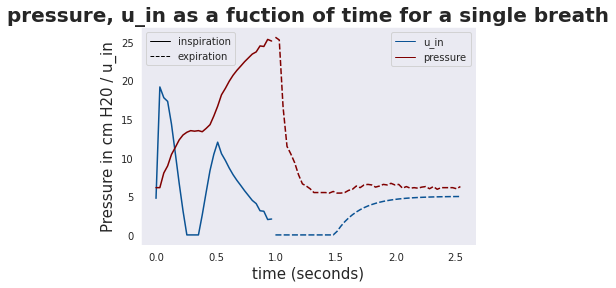

In [35]:
#Plot u_in and u_out as a function of time for a single breath

fig, ax = plt.subplots();
breath_id = 100

sns.lineplot(data = data[data['breath_id'] == breath_id], y = 'u_in', x = 'time_step', 
             ax = ax, alpha = 1, color = myblue,  style = 'u_out', legend = False,  );
sns.lineplot(data = data[data['breath_id'] == breath_id], y = 'pressure', x = 'time_step', 
             ax = ax, alpha = 1, color = 'maroon', style = 'u_out', legend = False  );

plt.title('pressure, u_in as a fuction of time for a single breath', fontweight = 'bold');
plt.xlabel('time (seconds)');
plt.ylabel('Pressure in cm H20 / u_in');

colors = [myblue, 'maroon', 'black']
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors] + [Line2D([0], [0], color='black', linewidth=1, linestyle='--')]
labels = ['u_in', 'pressure', 'inspiration', 'expiration']
legend1 = plt.legend(lines[0:2], labels[0:2], loc = 1)
legend2 = plt.legend(lines[2:], labels[2:], loc = 2)
ax.add_artist(legend1)
#ax.add_artist(legend2)

# ax.set(ylim=(0, 1));
data[data['breath_id'] == breath_id]

In [119]:
data[data['R']==5].groupby(['breath_id', 'R', 'C']).mean().head(20)

,,,id,time_step,u_in,u_out,pressure
breath_id,R,C,,,,,
6,5,50,440.5,1.361902,4.514348,0.6375,7.399957
13,5,50,840.5,1.360486,20.942186,0.6375,11.867658
14,5,50,920.5,1.343596,14.149799,0.6375,9.984440
17,5,20,1160.5,1.363772,11.764614,0.6375,12.136564
22,5,50,1560.5,1.270240,9.068910,0.6125,8.917604
36,5,50,2440.5,1.361958,12.776623,0.6375,9.596020
43,5,10,2920.5,1.269394,4.566015,0.6125,12.054838
57,5,10,3720.5,1.333097,6.995992,0.6250,14.611199
58,5,50,3800.5,1.270818,5.400176,0.6125,8.017737


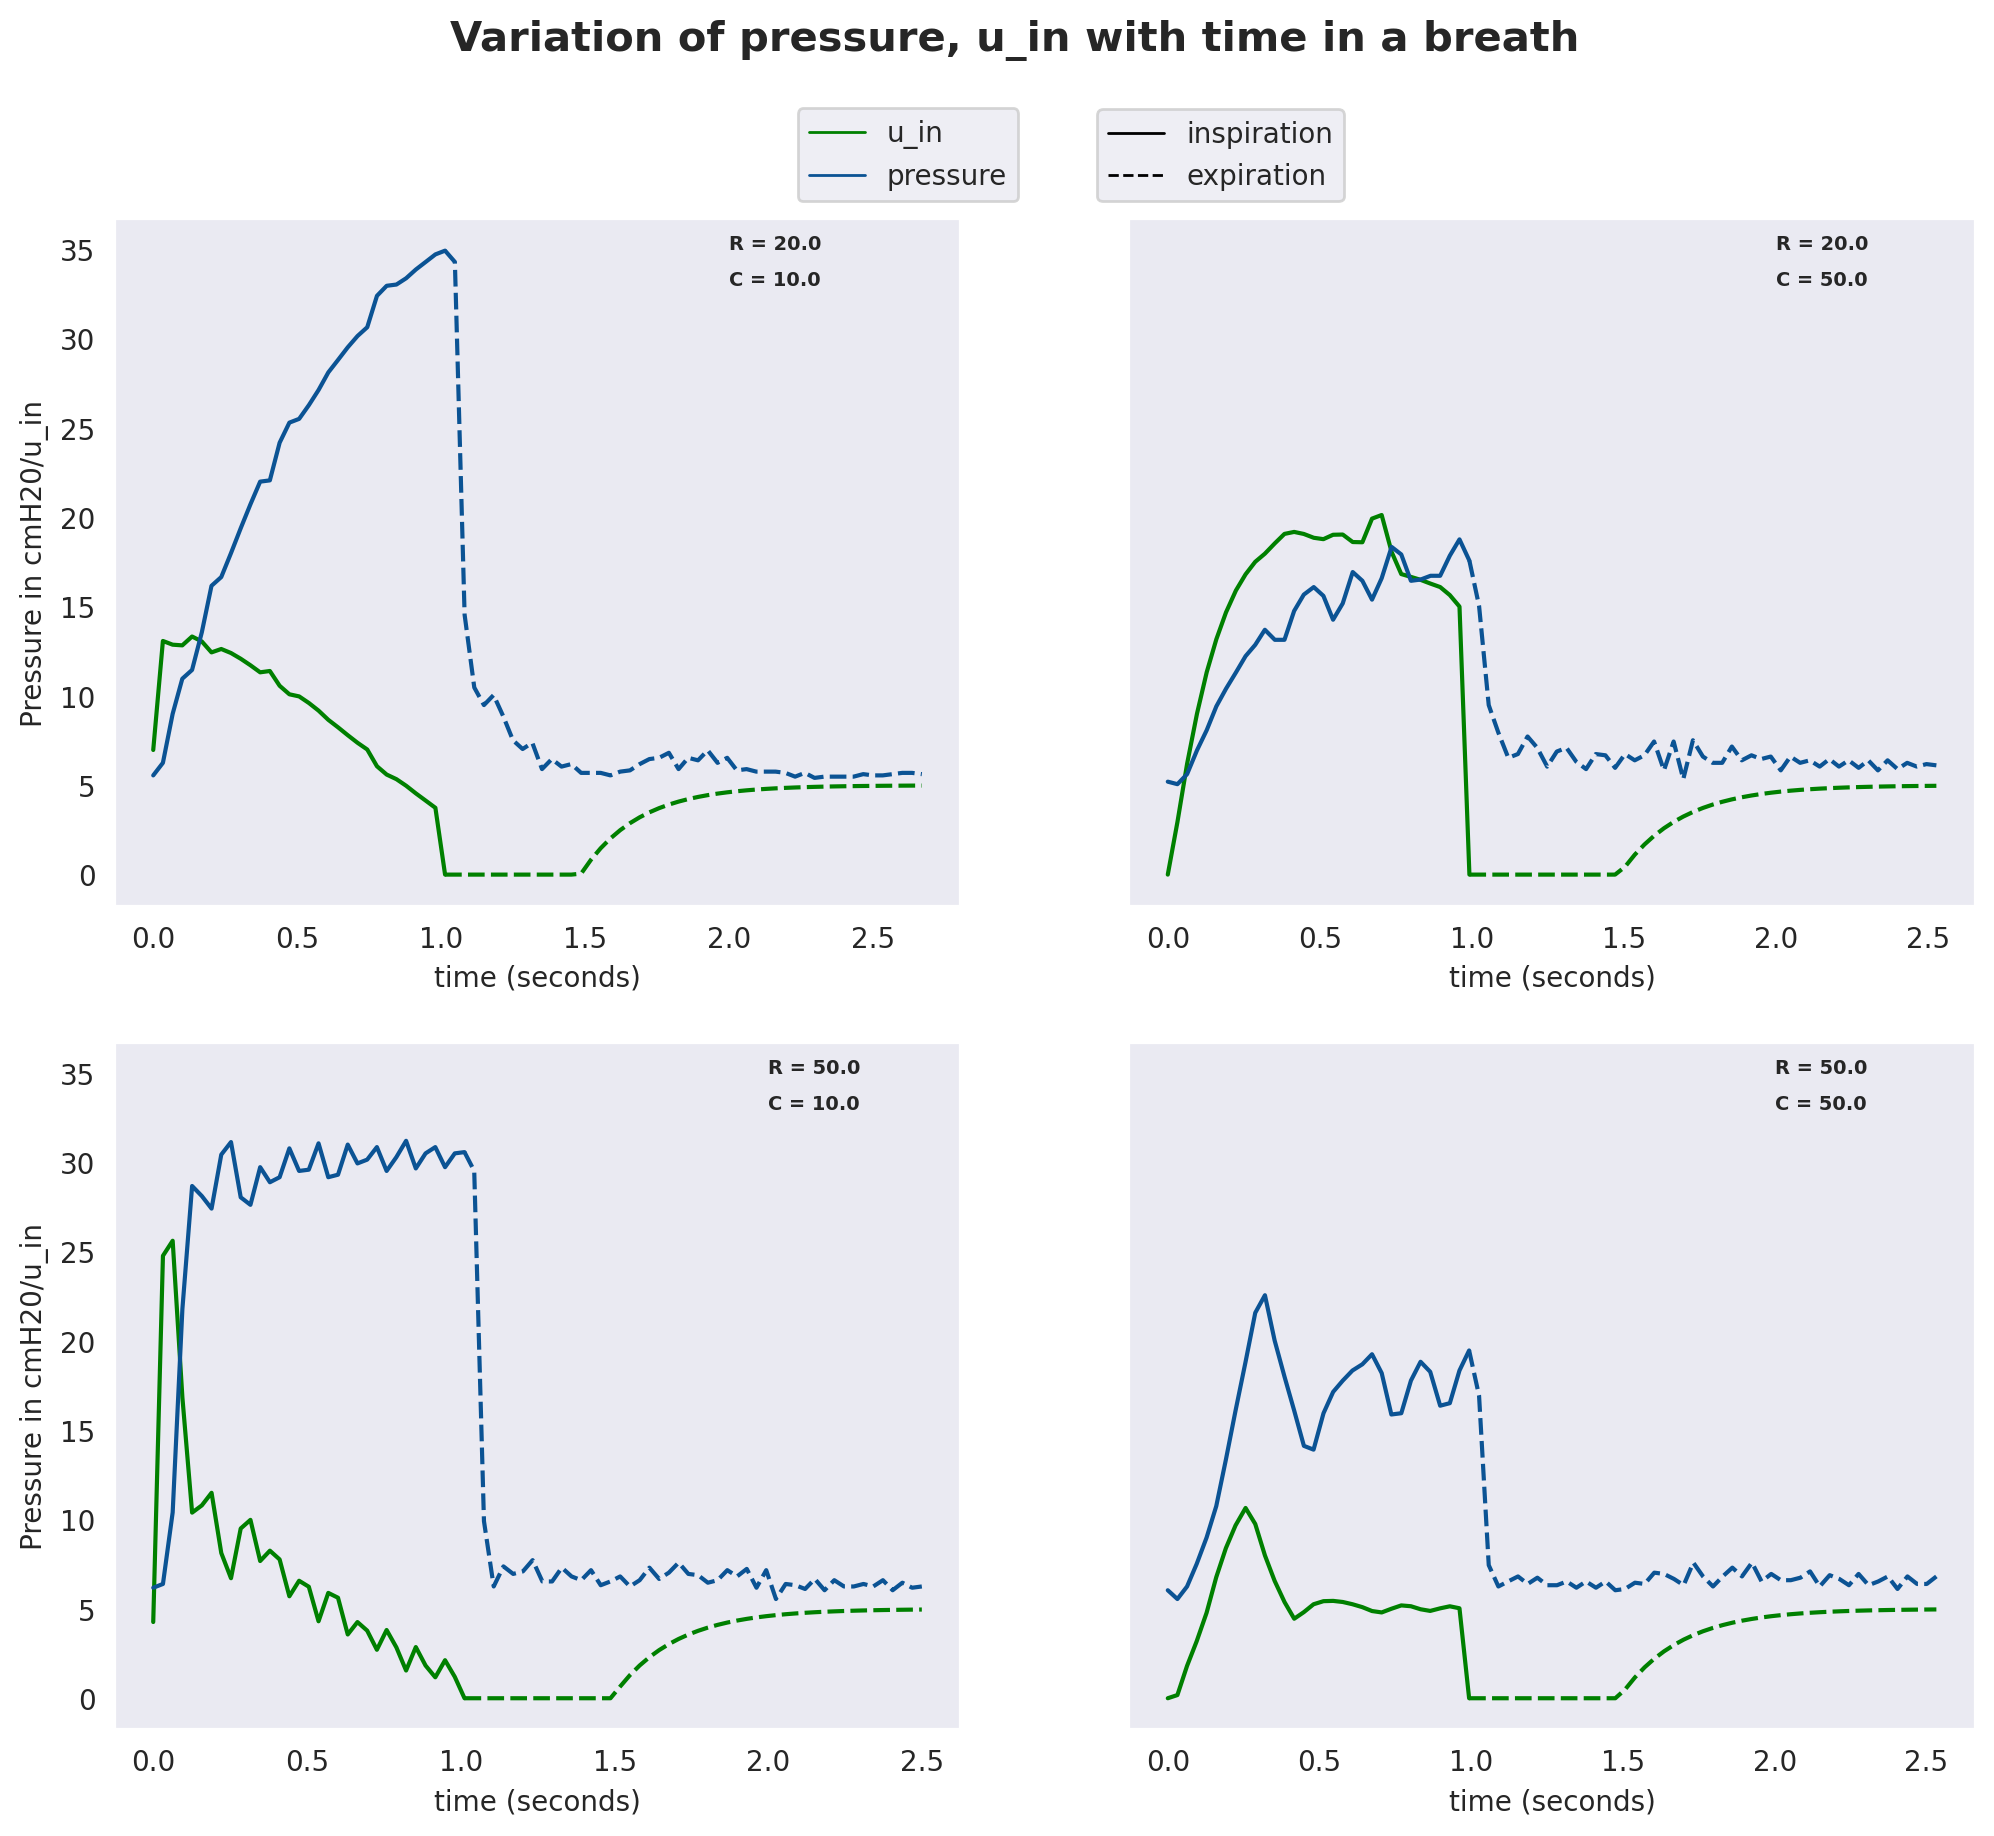

In [130]:
#Plot u_in and u_out as a function of time for a sample of six breaths

fig, ax = plt.subplots(2, 2, dpi=200, figsize=(12,10), sharey=True );

breath_ids = [21,19,26,27] 

for i, breath_id in enumerate(breath_ids):
    
    df = data[data['breath_id'] == breath_id].copy()
    row = df[df['u_out'] == 1].head(1)
    row['u_out'] = 0
    df = pd.concat([df, row])
    sns.lineplot( data = df, y = 'u_in', x = 'time_step', style = 'u_out', legend = False, 
                 ax = ax[i%len(breath_ids)//2, i%2], alpha = 1, color = 'green');
    sns.lineplot(data = df, y = 'pressure', x = 'time_step', style = 'u_out', legend = False,
                 ax = ax[i%len(breath_ids)//2, i%2], alpha = 1, color = myblue);
    ax[i%len(breath_ids)//2, i%2].set_xlabel('time (seconds)', fontsize=10);
    ax[i%len(breath_ids)//2, i%2].set_ylabel('Pressure in cmH20/u_in', fontsize=10);
    ax[i%len(breath_ids)//2, i%2].text(2, 35, f"R = {df['R'].mean()}", fontsize = 7, fontweight = 'bold')
    ax[i%len(breath_ids)//2, i%2].text(2, 33, f"C = {df['C'].mean()}", fontsize = 7, fontweight = 'bold')
    
  
fig.suptitle('Variation of pressure, u_in with time in a breath', fontsize=15, fontweight='bold');
colors = ['green', myblue, 'black']
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors] + [Line2D([0], [0], color='black', linewidth=1, linestyle='--')]
labels = ['u_in', 'pressure', 'inspiration', 'expiration']
legend1 = fig.legend(lines[0:2], labels[0:2], loc = (0.4,0.89))
legend2 = fig.legend(lines[2:], labels[2:], loc = (0.55, 0.89))


In [94]:
df['R'].mean()

5.0

In [15]:
data.groupby(['breath_id']).mean()

,id,R,C,time_step,u_in,u_out,pressure
breath_id,,,,,,,
1,40.5,20.0,50.0,1.344606,10.146007,0.6250,10.841247
2,120.5,20.0,20.0,1.344371,5.093747,0.6375,9.334145
3,200.5,50.0,20.0,1.262657,5.457599,0.6000,13.534698
4,280.5,50.0,50.0,1.264007,6.002238,0.6000,13.914329
6,440.5,5.0,50.0,1.361902,4.514348,0.6375,7.399957
...,...,...,...,...,...,...,...
125739,6035560.5,5.0,20.0,1.258665,2.692814,0.6000,6.184609
125742,6035720.5,20.0,10.0,1.332208,7.892086,0.6250,15.216677
125743,6035800.5,20.0,10.0,1.332587,2.358771,0.6250,7.597682


In [16]:
# Exploring the lung attributes R and C
data['R'].unique()
data['C'].unique()
data[['R','C']].value_counts()

array([20, 50,  5])

array([50, 20, 10])

R   C 
50  10    815200
5   10    499520
50  20    497440
5   50    496960
50  50    493600
20  50    492960
5   20    491360
20  20    371040
    10    364480
dtype: int64

In [17]:
data.corr()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
id,1.000000,0.999999,0.006153,0.005227,-0.000440,-0.001958,-0.000233,0.000182
breath_id,0.999999,1.000000,0.006160,0.005228,-0.000453,-0.001957,-0.000244,0.000189
R,0.006153,0.006160,1.000000,-0.094865,-0.014552,-0.147721,-0.007589,0.017199
C,0.005227,0.005228,-0.094865,1.000000,0.004877,0.151966,0.003683,-0.036748
time_step,-0.000440,-0.000453,-0.014552,0.004877,1.000000,-0.352915,0.839188,-0.525895
u_in,-0.001958,-0.001957,-0.147721,0.151966,-0.352915,1.000000,-0.417848,0.308629
u_out,-0.000233,-0.000244,-0.007589,0.003683,0.839188,-0.417848,1.000000,-0.616206
pressure,0.000182,0.000189,0.017199,-0.036748,-0.525895,0.308629,-0.616206,1.000000
